In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt

from matplottoy.data import simplex
from matplottoy.encoders import (color, position)
from matplottoy.artists import line, point

import utils

spath = Path("../../../draft/figures/code/")

In [4]:
table = simplex.EdgeSimplex()

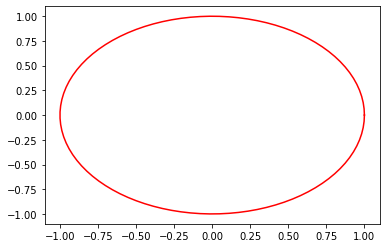

In [5]:
plt.plot(*table._xy(0, np.linspace(0,1,100)), color=table._color(0))

In [6]:
table.view()['color']

['red', 'orange', 'green', 'blue']

In [7]:
# data subsamples, 
# tau converts to axis coordinates
transforms = {'x': ('x', position.Identity()),
              'y': ('y', position.Identity()), 
              'color':('color', color.Identity())}

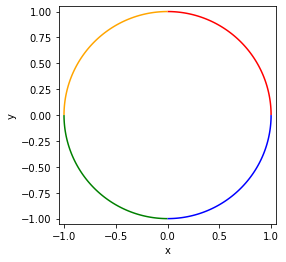

In [8]:
fig, ax = plt.subplots()

artist = line.Line(table, transforms)
ax.add_artist(artist)
ax.set(xlim = (-1.05, 1.05),
       ylim = (-1.05, 1.05),
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')
fig.savefig(spath/"line_1.png",  bbox_inches='tight')